In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src/features')
import build_features as bf

In [2]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [3]:
cleanTrain=bf.executeFeatures(originalDF)

3 columns were label encoded


In [10]:
missingValues(cleanTrain)

Your selected dataset has 32 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
creditTerm,12,0.0


In [4]:
for i in cleanTrain.columns:
    print(i)

TARGET
DAYS_BIRTH
scaledLogINC
DAYS_EMPLOYED_ANOM
DAYS_EMPLOYED_ZERO
DAYS_EMPLOYED
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
EDU_Academic degree
EDU_Higher education
EDU_Incomplete higher
EDU_Lower secondary
EDU_Secondary / secondary special
FAM_Civil marriage
FAM_Married
FAM_Separated
FAM_Single / not married
FAM_Unknown
FAM_Widow
INC_Businessman
INC_Commercial associate
INC_Maternity leave
INC_Pensioner
INC_State servant
INC_Student
INC_Unemployed
INC_Working
creditIncomePct
annuityIncomePct
creditTerm
daysEmployedPct


In [5]:
cleanTrain.columns = ['TARGET', 'DAYS_BIRTH', 'scaledLogINC', 'DAYS_EMPLOYED_ANOM' ,'DAYS_EMPLOYED_ZERO','DAYS_EMPLOYED', 
 'NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','EDU_Academic_degree', 'EDU_Higher_education', 'EDU_Incomplete_higher', 'EDU_Lower_secondary', 
 'EDU_Secondary_special', 'FAM_Civil_marriage', 'FAM_Married', 'FAM_Separated', 'FAM_Single', 'FAM_Unknown',
 'FAM_Widow','INC_Businessman','INC_Commercial','INC_Maternity' , 'INC_Pensioner','INC_State','INC_Student',
 'INC_Unemployed','INC_Working','creditIncomePct','annuityIncomePct','creditTerm','daysEmployedPct']

## Build Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cleanTrain.iloc[:,1:], 
                                                    cleanTrain.TARGET, test_size = 0.2, random_state = 0)

In [8]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)

In [9]:
clf.score(X_test, y_test)

0.9210607612636782

## Investigate with ANOVA

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
anovaTest = cleanTrain.columns[0] + " ~ " + cleanTrain.columns[1]
for i in cleanTrain.columns[2:]:
    anovaTest = anovaTest + " + " + i

In [12]:
anovaTest

'TARGET ~ DAYS_BIRTH + scaledLogINC + DAYS_EMPLOYED_ANOM + DAYS_EMPLOYED_ZERO + DAYS_EMPLOYED + NAME_CONTRACT_TYPE + FLAG_OWN_CAR + FLAG_OWN_REALTY + EDU_Academic_degree + EDU_Higher_education + EDU_Incomplete_higher + EDU_Lower_secondary + EDU_Secondary_special + FAM_Civil_marriage + FAM_Married + FAM_Separated + FAM_Single + FAM_Unknown + FAM_Widow + INC_Businessman + INC_Commercial + INC_Maternity + INC_Pensioner + INC_State + INC_Student + INC_Unemployed + INC_Working + creditIncomePct + annuityIncomePct + creditTerm + daysEmployedPct'

In [13]:
lm = ols(anovaTest, data=cleanTrain).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table[table['PR(>F)'] <= 0.005])

                          sum_sq   df           F         PR(>F)
DAYS_BIRTH             46.846100  1.0  644.183411  5.766234e-142
scaledLogINC            0.587957  1.0    8.085025   4.463545e-03
DAYS_EMPLOYED          58.220826  1.0  800.597926  6.738435e-176
NAME_CONTRACT_TYPE     41.553266  1.0  571.401348  3.631077e-126
FLAG_OWN_CAR           11.952735  1.0  164.362740   1.288757e-37
EDU_Academic_degree     1.248420  1.0   17.167089   3.424073e-05
EDU_Higher_education   14.359952  1.0  197.464531   7.709864e-45
EDU_Incomplete_higher  16.360558  1.0  224.974979   7.749781e-51
EDU_Lower_secondary    28.628688  1.0  393.674729   1.488843e-87
EDU_Secondary_special  25.558601  1.0  351.457792   2.256928e-78
FAM_Civil_marriage      1.377925  1.0   18.947922   1.343788e-05
FAM_Married             1.095286  1.0   15.061338   1.040949e-04
FAM_Separated           1.254017  1.0   17.244061   3.288121e-05
FAM_Single              1.344600  1.0   18.489672   1.708800e-05
FAM_Widow               1

In [47]:
## Test interactions
anovaTest = cleanTrain.columns[0] + " ~ " + cleanTrain.columns[1]
for i in cleanTrain.columns[2:]:
    anovaTest = anovaTest + " + " + i

for i in cleanTrain.columns[3:]:
    anovaTest = anovaTest + " + DAYS_BIRTH:" + i 
    
anovaTest

'TARGET ~ DAYS_BIRTH + scaledLogINC + DAYS_EMPLOYED_ANOM + DAYS_EMPLOYED_ZERO + DAYS_EMPLOYED + EDU_Academic_degree + EDU_Higher_education + EDU_Incomplete_higher + EDU_Lower_secondary + EDU_Secondary_special + FAM_Civil_marriage + FAM_Married + FAM_Separated + FAM_Single + FAM_Unknown + FAM_Widow + INC_Businessman + INC_Commercial + INC_Maternity + INC_Pensioner + INC_State + INC_Student + INC_Unemployed + INC_Working + DAYS_BIRTH:DAYS_EMPLOYED_ANOM + DAYS_BIRTH:DAYS_EMPLOYED_ZERO + DAYS_BIRTH:DAYS_EMPLOYED + DAYS_BIRTH:EDU_Academic_degree + DAYS_BIRTH:EDU_Higher_education + DAYS_BIRTH:EDU_Incomplete_higher + DAYS_BIRTH:EDU_Lower_secondary + DAYS_BIRTH:EDU_Secondary_special + DAYS_BIRTH:FAM_Civil_marriage + DAYS_BIRTH:FAM_Married + DAYS_BIRTH:FAM_Separated + DAYS_BIRTH:FAM_Single + DAYS_BIRTH:FAM_Unknown + DAYS_BIRTH:FAM_Widow + DAYS_BIRTH:INC_Businessman + DAYS_BIRTH:INC_Commercial + DAYS_BIRTH:INC_Maternity + DAYS_BIRTH:INC_Pensioner + DAYS_BIRTH:INC_State + DAYS_BIRTH:INC_Student +

In [48]:
lm = ols(anovaTest, data=cleanTrain).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table[table['PR(>F)'] <= 0.05])

                                  sum_sq   df           F         PR(>F)
DAYS_EMPLOYED_ZERO              0.330010  1.0    4.520799   3.348599e-02
DAYS_BIRTH:DAYS_EMPLOYED_ZERO   0.457253  1.0    6.263907   1.232273e-02
scaledLogINC                    0.655153  1.0    8.974934   2.737303e-03
DAYS_EMPLOYED                  59.672788  1.0  817.456684  1.488813e-179
EDU_Lower_secondary             1.863282  1.0   25.525079   4.369190e-07
EDU_Secondary_special           0.640526  1.0    8.774550   3.054858e-03
INC_Maternity                   0.438533  1.0    6.007454   1.424612e-02
INC_Unemployed                  0.306254  1.0    4.195370   4.053537e-02


In [19]:
## Test interactions
anovaTestbase = cleanTrain.columns[0] + " ~ " + cleanTrain.columns[1]
for i in cleanTrain.columns[2:]:
    anovaTestbase = anovaTestbase + " + " + i

features = {}
for i in cleanTrain.columns[2:]:
    anovaTest = anovaTestbase
    for j in cleanTrain.columns[2:]:
        anovaTest = anovaTest + " + " + i + ":" + j
    lm = ols(anovaTest, data=cleanTrain).fit()
    table = sm.stats.anova_lm(lm, typ=2)
    print("Interactions with: {}".format(i))
    print(table[table['PR(>F)'] <= 0.0005]['PR(>F)'])
    for key in table[table['PR(>F)'] <= 0.0005].index:
        if key in features:
            features[key] += 1
        else:
            features[key] = 1
    print("\n")


Interactions with: scaledLogINC
DAYS_BIRTH                       1.383690e-138
DAYS_EMPLOYED                    2.609293e-174
NAME_CONTRACT_TYPE               4.368441e-124
FLAG_OWN_CAR                      9.826583e-37
EDU_Higher_education              2.087006e-18
EDU_Incomplete_higher             9.406405e-22
EDU_Lower_secondary               4.378177e-39
EDU_Secondary_special             3.937010e-33
creditIncomePct                  1.984798e-189
annuityIncomePct                 1.892065e-192
creditTerm                       1.268995e-181
scaledLogINC:creditIncomePct      3.033956e-05
scaledLogINC:annuityIncomePct     1.000733e-07
scaledLogINC:creditTerm           1.996838e-06
Name: PR(>F), dtype: float64


Interactions with: DAYS_EMPLOYED_ANOM
DAYS_EMPLOYED_ZERO                           5.536792e-80
DAYS_BIRTH                                  4.869768e-140
DAYS_EMPLOYED                                2.612308e-13
DAYS_EMPLOYED_ANOM:DAYS_EMPLOYED             2.291748e-09
NAME_CONT

Interactions with: EDU_Higher_education
DAYS_BIRTH                                    9.403992e-146
DAYS_EMPLOYED                                 1.339672e-175
NAME_CONTRACT_TYPE                            6.921154e-122
FLAG_OWN_CAR                                   5.858197e-38
EDU_Academic_degree                            1.379639e-12
EDU_Incomplete_higher                          4.591566e-25
EDU_Lower_secondary                            1.180105e-74
EDU_Secondary_special                          1.333461e-43
FAM_Civil_marriage                             1.176571e-04
FAM_Separated                                  1.981619e-04
FAM_Single                                     1.764262e-04
FAM_Widow                                      2.749091e-04
creditIncomePct                               4.332062e-193
annuityIncomePct                              3.969610e-197
creditTerm                                    1.780338e-187
EDU_Higher_education:DAYS_EMPLOYED             1.679843e-16


Interactions with: INC_Businessman
DAYS_BIRTH              5.711636e-142
DAYS_EMPLOYED           6.747666e-176
NAME_CONTRACT_TYPE      3.633718e-126
FLAG_OWN_CAR             1.289856e-37
EDU_Higher_education     7.288813e-44
FAM_Civil_marriage       6.081170e-05
FAM_Married              1.734831e-04
FAM_Single               3.578895e-05
creditIncomePct         1.600367e-195
annuityIncomePct        4.736987e-200
creditTerm              8.879670e-189
Name: PR(>F), dtype: float64


Interactions with: INC_Commercial
DAYS_BIRTH                           7.986867e-146
DAYS_EMPLOYED                        2.096492e-142
NAME_CONTRACT_TYPE                   4.108463e-126
FLAG_OWN_CAR                          6.137633e-38
EDU_Academic_degree                   2.852451e-05
EDU_Higher_education                  6.047487e-59
EDU_Incomplete_higher                 3.908812e-65
EDU_Lower_secondary                  7.845080e-110
EDU_Secondary_special                4.199008e-104
FAM_Civil_marriage     

Interactions with: annuityIncomePct
DAYS_BIRTH                          2.670767e-143
DAYS_EMPLOYED                       3.527744e-175
NAME_CONTRACT_TYPE                  1.295373e-110
FLAG_OWN_CAR                         5.447836e-37
EDU_Higher_education                 3.714563e-07
EDU_Incomplete_higher                8.684637e-10
EDU_Lower_secondary                  7.717869e-24
EDU_Secondary_special                8.583521e-21
creditIncomePct                     8.906515e-190
creditTerm                          5.231165e-181
annuityIncomePct:scaledLogINC        1.015778e-22
annuityIncomePct:creditIncomePct     4.324259e-08
Name: PR(>F), dtype: float64


Interactions with: creditTerm
DAYS_BIRTH                          7.407851e-132
DAYS_EMPLOYED                       1.248461e-174
NAME_CONTRACT_TYPE                  2.104040e-120
FLAG_OWN_CAR                         1.321889e-37
EDU_Academic_degree                  2.176601e-05
INC_Commercial                       1.895320e-04
INC

In [ ]:
plt.xticks(rotation=90)

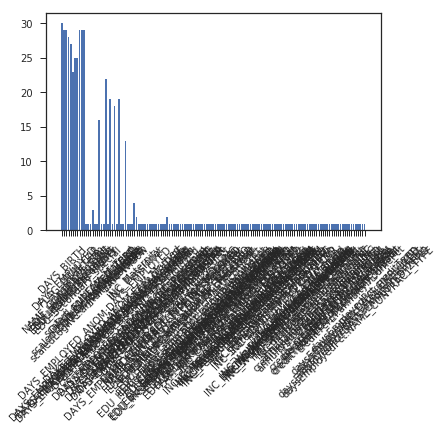

In [25]:
plt.bar(range(len(features)), list(features.values()), align='center')
plt.xticks(range(len(features)), list(features.keys()),rotation=45)

plt.show()

In [27]:
len(features)

139

In [28]:
{k:v for (k,v) in features.items() if v > 2}

{'DAYS_BIRTH': 30,
 'DAYS_EMPLOYED': 29,
 'NAME_CONTRACT_TYPE': 29,
 'FLAG_OWN_CAR': 28,
 'EDU_Higher_education': 27,
 'EDU_Incomplete_higher': 23,
 'EDU_Lower_secondary': 25,
 'EDU_Secondary_special': 25,
 'creditIncomePct': 29,
 'annuityIncomePct': 29,
 'creditTerm': 29,
 'DAYS_EMPLOYED_ZERO': 3,
 'EDU_Academic_degree': 16,
 'FAM_Civil_marriage': 22,
 'FAM_Married': 19,
 'FAM_Separated': 18,
 'FAM_Single': 19,
 'FAM_Widow': 13,
 'INC_Maternity': 4}

In [49]:
newModel = pd.DataFrame(cleanTrain[['TARGET', 'DAYS_EMPLOYED_ZERO','DAYS_BIRTH', 'scaledLogINC', 'DAYS_EMPLOYED',
                                   'EDU_Incomplete_higher', 'EDU_Incomplete_higher', 'EDU_Lower_secondary',
                                   'EDU_Secondary_special', 'INC_Maternity', 'INC_Student', 'INC_Unemployed']])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(newModel.iloc[:,1:], 
                                                    newModel.TARGET, test_size = 0.2, random_state = 0)

In [35]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)

In [36]:
clf.score(X_test, y_test)

0.9210607612636782

In [37]:
log_reg_pred = clf.predict_proba(X_test)[:, 1]

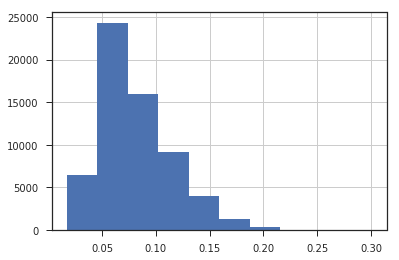

In [40]:
pd.Series(log_reg_pred).hist()

In [41]:
pd.Series(log_reg_pred).describe()

count    61503.000000
mean         0.081363
std          0.033123
min          0.017430
25%          0.058089
50%          0.073869
75%          0.100792
max          0.300117
dtype: float64